# **Project title**: Credit Card Fraud Detection

## **Group Members**:

### *Gautam Thakran*
### *Kalpesh Pravin Patil*
### *Pooja Indraj Yadav*
### *Priyank Bhaveshbhai Siddhapura*

# Project Charter

**Problem Statement:** Credit card fraud detection is critical to prevent financial losses and protect consumers. This project aims to develop a real-time machine learning system that analyzes transaction patterns to accurately identify fraudulent activities, minimizing false positives and adapting to emerging fraud tactics. Another issue with the dataset is class imbalanced as it contains less than 0.1% positive cases where there is a fraud.

**Goals:** Our goal is to successfully detect fraud by maximizing true positives while minimizing false negatives and false positives. The system will leverage machine learning algorithms to analyze transaction patterns and continuously adapt to emerging fraud tactics, ensuring high accuracy in real-time fraud detection.

**Project scope:** This project focuses on developing a real-time credit card fraud detection system using machine learning techniques. The system will analyze transaction data, such as transaction amount, time, and other PCA features, to identify fraudulent transactions. We plan to perform at least 2 classification alogrithm. At the end, after finding most effective model based on evaluation metrics, we will deploy the model using Flask API.

**Objectives:**
*   Develop a machine learning model to detect fraudulent transactions with high accuracy.
*  Maximize true positives and minimize false positives and false negatives in fraud detection.
* Focusing on Precision, recall and F1-score metrics more comapred to accuracy.
* It is computational friedly, which means using model that provides effective results with less computation power.
* Finding best method using Hyperparamter Tunning.
* Deploy the model.

**Intended approach:** Our first step will be performing Exploratory Data Analysis (EDA) on the dataset to gain a better understanding of its structure and characteristics. Next, we will identify and address any null values and outliers in the data. We will then apply Logistic Regression to the imbalanced dataset and later use balancing techniques to evaluate their impact on the model's performance. Additionally, we will implement the XGBoost algorithm, which is known for its robustness in handling imbalanced datasets, and compare its performance against Logistic Regression to determine which model performs better. Afterward, we will perform hyperparameter tuning on the best-performing model based on evaluation metrics. Finally, we will deploy the optimal model using a Flask API.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/creditcard.csv')

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Descriptive statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# looking for any null values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


There are no missing values in the dataset

In [7]:
# find any exsting duplicate rows
total_duplicates = df.duplicated().sum()

print(f"Total number of duplicate rows: {total_duplicates}")

Total number of duplicate rows: 1081


In [8]:
 # remove duplicates
df.drop_duplicates(inplace=True)

In [9]:
X = df.drop('Class', axis=1) # Features
y = df['Class'] # labels

In [10]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


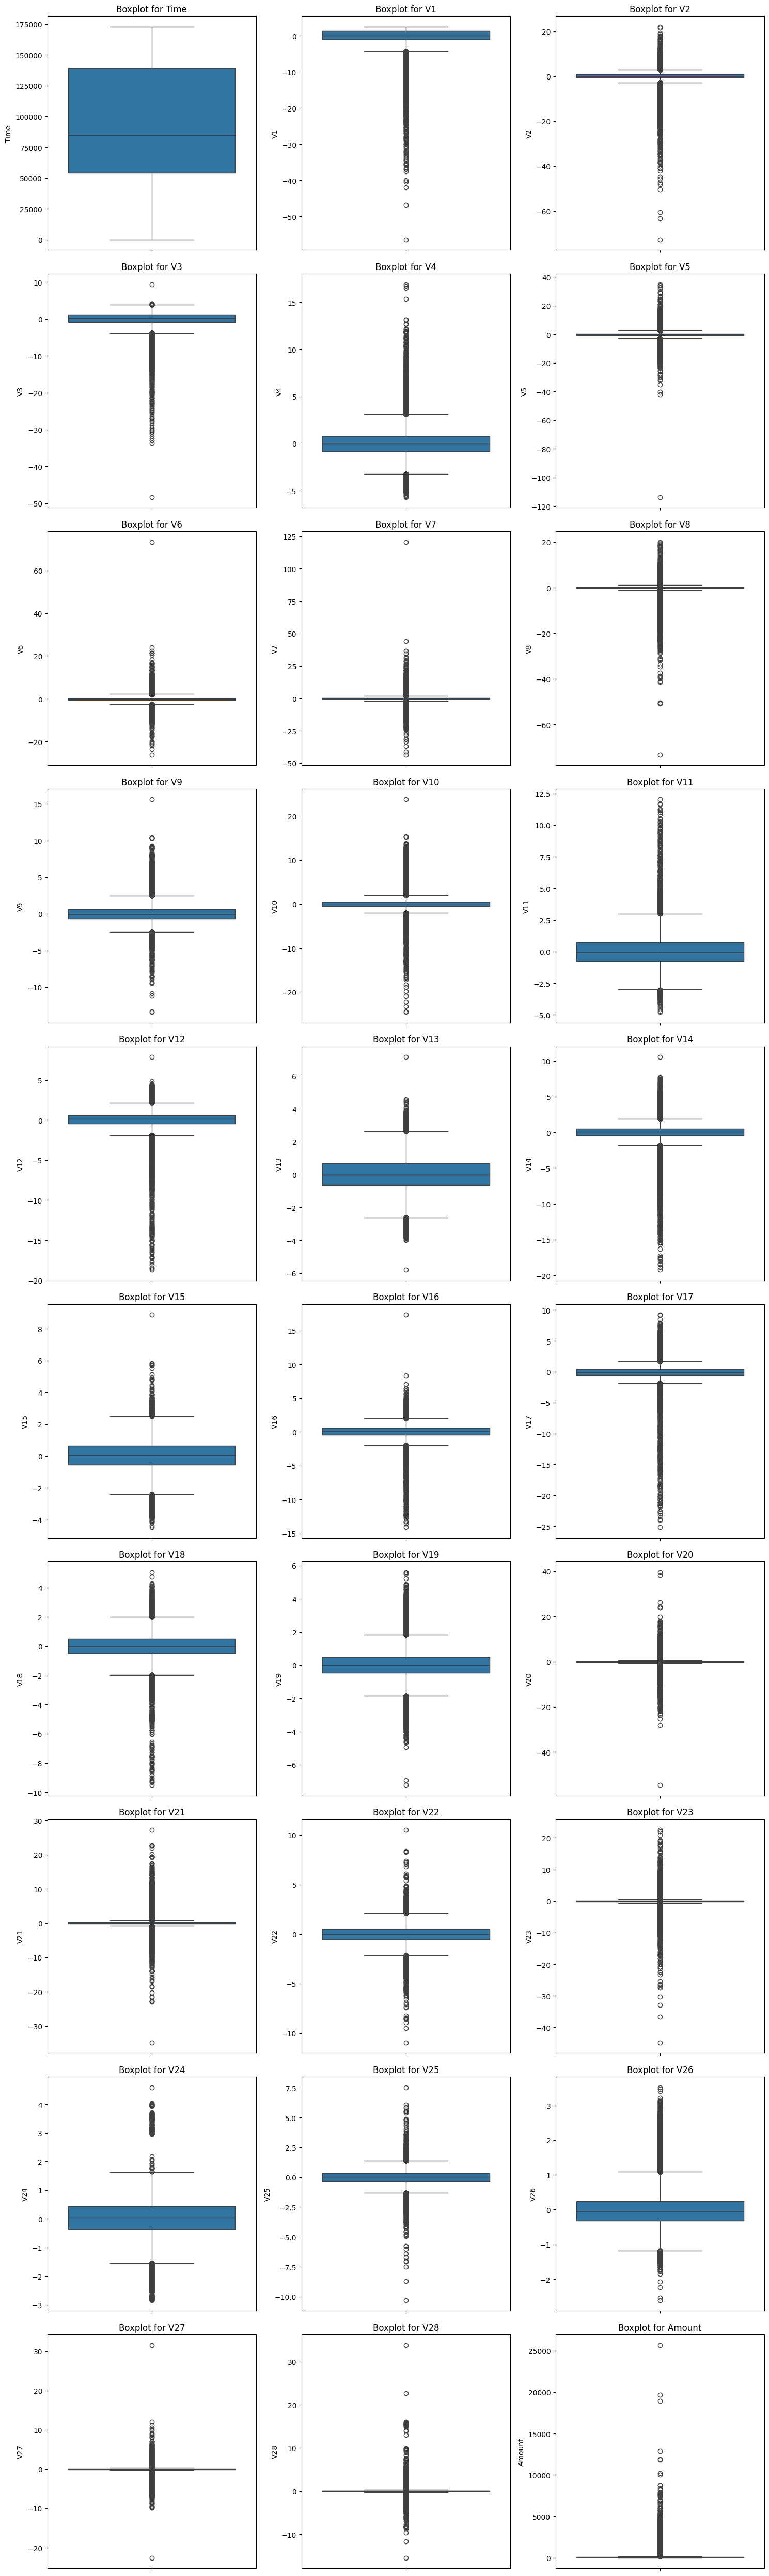

In [11]:
# creating box plot for outlier visualization

numeric_columns = [col for col in X.columns]
rows = math.ceil(len(numeric_columns) / 3)

fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f"Boxplot for {column}")

# Remove empty subplots if columns are fewer than grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [12]:
# Using standard scalaer for scaling the feature
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [13]:
# Converting scaled data from numpy array to dataframe
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

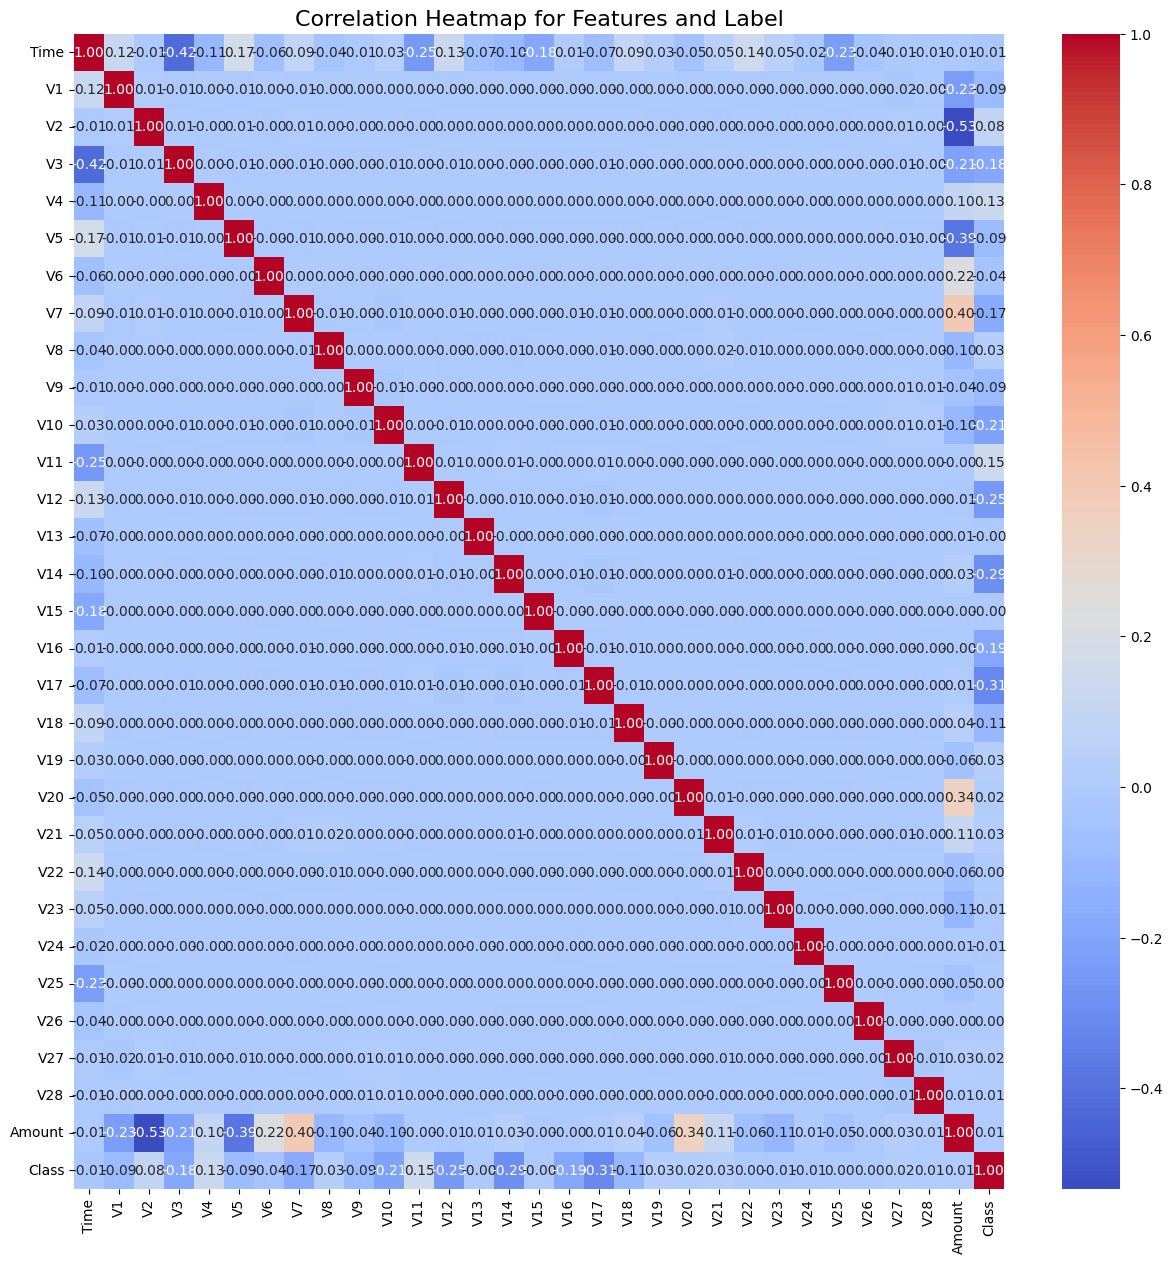

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Draw the heatmap with annotations
sns.heatmap(correlation_matrix,
            annot=True,        # Display correlation values
            fmt=".2f",         # Format the values (2 decimal places)
            cmap='coolwarm')   # Color map   # Correlation range

# Add title
plt.title('Correlation Heatmap for Features and Label', fontsize=16)

# Show the plot
plt.show()


In [15]:
# Relation of class lable with every other features
label_correlation = correlation_matrix['Class'].sort_values(ascending=False)
print(label_correlation)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


In [17]:
# Split the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [18]:
# Initializing logisgtic regression model
model = LogisticRegression(class_weight='balanced') # We used balacned method to penalize wrong predition for minority class hardly.
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [19]:
y_predict = model.predict(X_test)

In [20]:
# Calculate Accuracy, Precision, and F1 Score
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

In [21]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.05
F1 Score: 0.10


In [22]:
y_predict_proba = model.predict_proba(X_test)[:, 1]

In [23]:
# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_predict_proba)
print("\nAUC-ROC Score:", roc_auc)


AUC-ROC Score: 0.970564851423013


In [24]:
print(y.value_counts())

Class
0    283253
1       473
Name: count, dtype: int64


In [25]:
print(y_train.value_counts())

Class
0    226597
1       383
Name: count, dtype: int64


In [26]:
!pip install imbalanced-learn

### Oversampling using SMOTE

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE(random_state=42)

# Resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_train_smote.value_counts())


Class
0    226597
1    226597
Name: count, dtype: int64


As you can observer that the data is now properly balanced

In [29]:
# Initialize Logistic Regression with default settings
logreg = LogisticRegression(class_weight= 'balanced', max_iter= 10000)

# Train the model on the resampled data
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', max_iter=10000)

### obs.
after 10000 max interation the models metrics were unchanged.

In [30]:
# Make predictions
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [32]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.99
Precision: 0.12
F1 Score: 0.21


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [34]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nAUC-ROC Score:", roc_auc)

Confusion Matrix:
[[56089   567]
 [   14    76]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.12      0.84      0.21        90

    accuracy                           0.99     56746
   macro avg       0.56      0.92      0.60     56746
weighted avg       1.00      0.99      0.99     56746


AUC-ROC Score: 0.9738503718346984


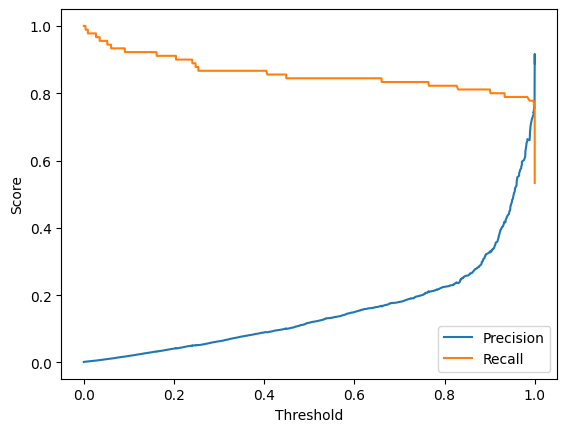

In [35]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()


### XGBoost Classifier

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("Precision:", precision_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

Precision: 0.92
F1 Score: 0.8363636363636363


In [37]:
y_train.value_counts()

,count
Class,
0,226597
1,383


In [38]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.92      0.77      0.84        90

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [39]:
print(confusion_matrix(y_test, y_pred_xgb))

[[56650     6]
 [   21    69]]


In [40]:
print(roc_auc_score(y_test, y_pred_xgb))

0.8832803821895886


In [41]:
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9897613928735065


# Hyperparamter Tunning

### GridSearchCV

In [42]:
param_grid = {
    'n_estimators': [50, 75, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs= 2
)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:18:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=2,
             param_grid={'gamma': [0, 1, 5], 'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 75, 100],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [44]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 75, 'subsample': 0.8}
Best Cross-Validation Score: 0.9995770552471583
Test Accuracy: 0.9995065731505305
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.72      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



### Save the best model

In [46]:
import joblib

# Save the best model
joblib.dump(grid_search.best_estimator_, 'best_xgboost_model.pkl')

print("Best model saved to 'best_xgboost_model.pkl'")

Best model saved to 'best_xgboost_model.pkl'


In [47]:
# Mounting the google drive to save the model for better accessibility as we are working in colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
# Specify the path in Google Drive where you want to save the model
model_path = '/content/drive/My Drive/MLP_model/best_xgboost_model.pkl'

# Save the best model
joblib.dump(grid_search.best_estimator_, model_path)

print(f"Best model saved to {model_path}")

Best model saved to /content/drive/My Drive/MLP_model/best_xgboost_model.pkl


In [50]:
!pip install flask flask-ngrok

In [52]:
!pip install pyngrok

### Model Deployment using Flask API

In [58]:
from pyngrok import ngrok

# Set your ngrok auth token
ngrok.set_auth_token("2pxyMY1Pq2a4NVs7uFAdke5Nbtq_54ZzbdvzfwB3YToa2ouhm")

# Set up the tunnel
public_url = ngrok.connect(5000)
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:5000\"")

 * ngrok tunnel "NgrokTunnel: "https://d57e-34-19-45-12.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000"


In [63]:
from flask import Flask, request, jsonify
import joblib
import numpy as np
from pyngrok import ngrok
import threading

# Set your ngrok auth token
ngrok.set_auth_token("2pxyMY1Pq2a4NVs7uFAdke5Nbtq_54ZzbdvzfwB3YToa2ouhm")

# Initialize Flask app
app = Flask(__name__)

# Load the trained XGBoost model
model = joblib.load('/content/drive/My Drive/MLP_model/best_xgboost_model.pkl')

@app.route('/')
def home():
    return "Welcome to the Flask API!"

@app.route('/favicon.ico')
def favicon():
    return '',

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Parse the input JSON
        data = request.json
        features = np.array(data['features']).reshape(1, -1)

        # Predict using the loaded model
        prediction = model.predict(features)
        prediction_proba = model.predict_proba(features)

        # Create response
        response = {
            'prediction': int(prediction[0]),
            'probability': prediction_proba.tolist()
        }
        return jsonify(response)

    except Exception as e:
        # Handle errors
        return jsonify({'error': str(e)}), 400

def run():
    # Start Flask app
    app.run(debug=True, use_reloader=False)

# Set up ngrok tunnel to Flask
public_url = ngrok.connect(5000)
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:5000\"")

# Run Flask app in a separate thread
thread = threading.Thread(target=run)
thread.start()


 * ngrok tunnel "NgrokTunnel: "https://b53e-34-19-45-12.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: on


In [64]:
import requests

url = "https://b53e-34-19-45-12.ngrok-free.app/predict"
data = {
    "features": [
        [4462,-2.303349568,1.75924746,-0.359744743,2.330243051,-0.821628328,-0.075787571,0.562319782,-0.399146578,-0.238253368,-1.525411627,2.032912158,-6.560124295,0.022937323,-1.470101536,-0.698826069,-2.282193829,-4.781830856,-2.615664945,-1.334441067,-0.430021867,-0.294166318,-0.932391057,0.172726296,-0.087329538,-0.156114265,-0.542627889,0.039565989,-0.153028797,239.93],
        [6986,-4.397974442,1.358367028,-2.592844218,2.679786967,-1.128130942,-1.706536388,-3.496197293,-0.248777743,-0.247767899,-4.801637406,4.895844223,-10.91281932,0.184371686,-6.771096725,-0.007326183,-7.358083221,-12.59841854,-5.131548628,0.308333946,-0.171607879,0.573574068,0.176967718,-0.436206884,-0.053501865,0.252405262,-0.657487755,-0.827135715,0.84957338,59],
        [7,-0.644269442,1.417963545,1.074380376,-0.492199018,0.948934095,0.428118463,1.120631358,-3.807864239,0.615374731,1.249376178,-0.619467796,0.291474353,1.757964214,-1.32386522,0.686132504,-0.076126999,-1.222127345,-0.35822157,0.324504731,-0.156741852,1.94346534,-1.01545471,0.05750353,-0.649709006,-0.415266566,-0.051634297,-1.206921081,-1.085339188,40.8],
        [70780,0.97393336,-0.387346438,0.673015655,0.457212857,-0.731891316,-0.183026164,-0.277943005,0.051100838,0.099870815,0.006234838,1.150795014,0.959596656,0.462280811,0.195830427,0.627351161,0.875739628,-0.912969116,0.436696395,0.081452893,0.207302951,0.016658674,-0.246844284,-0.066268503,0.042749941,0.116448272,0.307801001,-0.039912349,0.033294389,128]
    ]
}

lis = []
for feature_set in data["features"]:
    response = requests.post(url, json={"features": [feature_set]})
    lis.append(response)
    print(response.json())

INFO:werkzeug:127.0.0.1 - - [09/Dec/2024 06:41:11] "POST /predict HTTP/1.1" 200 -


{'prediction': 1, 'probability': [[0.13081443309783936, 0.8691855669021606]]}


INFO:werkzeug:127.0.0.1 - - [09/Dec/2024 06:41:11] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Dec/2024 06:41:12] "POST /predict HTTP/1.1" 200 -


{'prediction': 1, 'probability': [[0.021184980869293213, 0.9788150191307068]]}


INFO:werkzeug:127.0.0.1 - - [09/Dec/2024 06:41:12] "POST /predict HTTP/1.1" 200 -


{'prediction': 0, 'probability': [[0.9998891949653625, 0.00011080753029091284]]}
{'prediction': 0, 'probability': [[0.9998841285705566, 0.0001158643135568127]]}
